<a href="https://colab.research.google.com/github/hemrajojha/CSC410/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#k-means clustering algorithm implementation
#source: https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/#h2_10
#https://medium.com/geekculture/implementing-k-means-clustering-with-k-means-initialization-in-python-7ca5a859d63a

In [3]:
#import required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#import kmeans library
from sklearn.cluster import KMeans


In [5]:
#setup google drive
from google.colab import drive

In [6]:
#mount drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#locate file in google drive (uploaded it separately)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CountryClusters.csv')

In [8]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


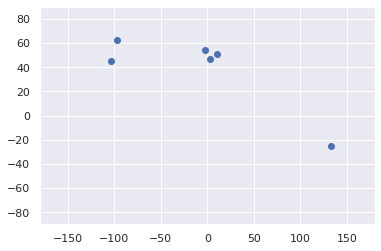

In [9]:
#plotting the data
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [10]:
#selecting the feature
x = data.iloc[:,1:3] # first for rows and second for columns
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [11]:
#clustering
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [12]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters


array([0, 0, 1, 1, 1, 2], dtype=int32)

In [13]:
cluster_no=pd.DataFrame(identified_clusters)
cluster_no

,0
0,0
1,0
2,1
3,1
4,1
5,2


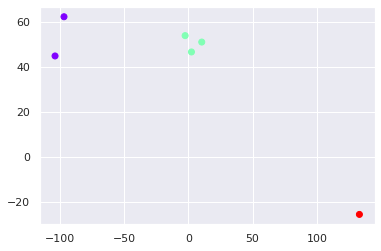

In [14]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [15]:
countries=data.iloc[:,0:1]
countries

,Country
0,USA
1,Canada
2,France
3,UK
4,Germany
5,Australia


In [16]:
countries.join(cluster_no)

,Country,0
0,USA,0
1,Canada,0
2,France,1
3,UK,1
4,Germany,1
5,Australia,2


Text(0, 0.5, 'WCSS')

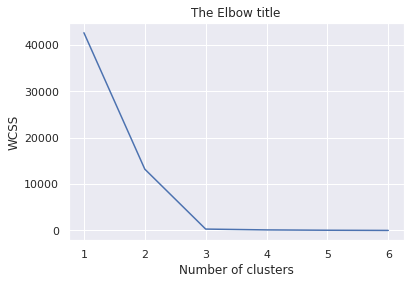

In [17]:
#to find no .of clusters to be selected
#WCSS and Elbow Method
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_ #Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  

In [18]:
#we can choose 3 as no. of clusters, this method shows what is the good number of clusters.

In [63]:
#k-mediods
#https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html#
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
     |████████████████████████████████| 23.1 MB 5.3 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [34]:
#import KMediods package
from sklearn_extra.cluster import KMedoids

In [44]:
#select 3 clusters
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(x)

In [46]:
#clustering
clusters = kmedoids.predict(x)
clusters

array([1, 1, 0, 0, 2, 2])

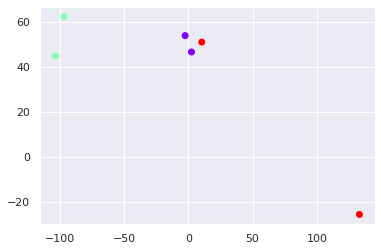

In [38]:
data_with_clusters_1 = data.copy()
data_with_clusters_1['Clusters'] = clusters 
plt.scatter(data_with_clusters_1['Longitude'],data_with_clusters_1['Latitude'],c=data_with_clusters_1['Clusters'],cmap='rainbow')

In [47]:
kmedoids.cluster_centers_ #cluster centers

array([[ 46.75,   2.4 ],
       [ 62.4 , -96.8 ],
       [ 51.15,  10.4 ]])

In [48]:
kmedoids.inertia_ #Sum of distances of samples to their closest cluster center.

172.20343097469902

Text(0, 0.5, 'WCSS')

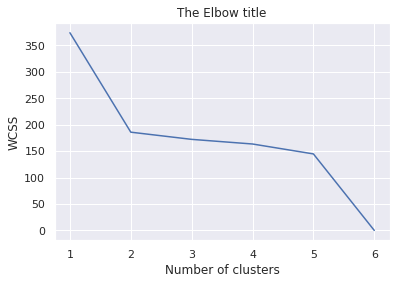

In [50]:
#to find no .of clusters to be selected
#WCSS and Elbow Method
wcss=[]
for i in range(1,7):
  kmedoids = KMedoids(i)
  kmedoids.fit(x)
  wcss_iter = kmedoids.inertia_ #Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 

In [51]:
#differene between kmeans and kmedoids
#http://www.math.le.ac.uk/people/ag153/homepage/KmeansKmedoids/Kmeans_Kmedoids.html


In [52]:
#Task: Implement the kmeans clustering for Iris dataset using the link below
#https://heartbeat.comet.ml/k-means-clustering-using-sklearn-and-python-4a054d67b187